In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import random as r

In [2]:
#determinant test; return 1 if r is left of line pq, -1 if r right of line pq, 0 if on line pq
def detTest(px,py,qx,qy,rx,ry):
    D=np.array([[1,px,py],[1,qx,qy],[1,rx,ry]],dtype='i8')
    return int(np.sign(np.linalg.det(D)))
    
#returns true iff pq and rs cross
def cross(px,py,qx,qy,rx,ry,sx,sy):
    pqr=detTest(px,py,qx,qy,rx,ry)
    pqs=detTest(px,py,qx,qy,sx,sy)
    if not ((pqr==1 and pqs==-1) or (pqr==-1 and pqs==1)):
        return False
    rsp=detTest(rx,ry,sx,sy,px,py)
    rsq=detTest(rx,ry,sx,sy,qx,qy)
    if not ((rsp==1 and rsq==-1) or (rsp==-1 and rsq==1)):
        return False
    return True

In [3]:
#classes for points and segments
class Point:
    def __init__(self, x, y):
        self.x=x
        self.y=y
    def plot(self):
        plt.scatter(self.x,self.y)
        
    def prt(self):
        print((self.x,self.y))
            
    def __lt__(self,other):
        return self.x<other.x or (self.x==other.x and self.y<other.y)        
    def __gt__(self,other):
        return self.x>other.x or (self.x==other.x and self.y>other.y)    
    def __eq__(self,other):
        return self.x==other.x and self.y==other.y    
    def __le__(self,other):
        return self.x<other.x or (self.x==other.x and self.y<=other.y)    
    def __ge__(self,other):
        return self.x>other.x or (self.x==other.x and self.y>=other.y)   
    def __ne__(self,other):
        return not (self==other)

#color is 0 for red, 1 for blue
class Segment:
    def __init__(self,pointA,pointB,color):
        if pointA<pointB:
            self.p=pointA
            self.q=pointB
        else:
            self.p=pointB
            self.q=pointA
        self.color=color
    
    def prt(self):
        if self.color==0:
            print((self.p.x,self.p.y), (self.q.x,self.q.y),'red')
        else:
            print((self.p.x,self.p.y), (self.q.x,self.q.y),'blue')
    
    def cmpPt(self,p):
        return detTest(self.p.x,self.p.y,self.q.x,self.q.y,p.x,p.y)
    
    def cmp(self,other):
        sp=other.cmpPt(self.p)
        sq=other.cmpPt(self.q)
        if sp*sq<0:
            sp=self.cmpPt(other.p)
            sq=self.cmpPt(other.q)
            if sp==0:
                return sq
            return sp
        if sp==0:
            return sq
        return sp
    
    def cross(self,segB):
        return cross(self.p.x,self.p.y,self.q.x,self.q.y,segB.p.x,segB.p.y,segB.q.x,segB.q.y)
    
    def col(self,seg):
        if self.cmpPt(seg.p)==0 and self.cmpPt(seg.q)==0:
            return True
        else:
            return False
    def slope(self):
        if (self.q.x-self.p.x)==0:
            return float('inf')
        else:
            return (self.q.y-self.p.y)/(self.q.x-self.p.x)
    def plot(self):
        if self.color==0:
            plt.plot([self.p.x,self.q.x],[self.p.y,self.q.y],'r')
        else:
            plt.plot([self.p.x,self.q.x],[self.p.y,self.q.y],'b')
    

    #ordered by aboveness (no intersections)
    #should only compare same colored segs
    def __lt__(self,other):
        return self.cmp(other)<0
    def __gt__(self,other):
        return self.cmp(other)>0
    def __eq__(self,other):
        if other==None:
            return False
        return self.cmp(other)==0
    def __le__(self,other):
        return self.cmp(other)<=0
    def __ge__(self,other):
        return self.cmp(other)>=0
    def __ne__(self,other):
        return not self==other
    
            

#flags are made from a segment and a endpoint of the segment
#0 is for startpt, 1 is for endpt
class Flag:
    def __init__(self, segment, endpoint):
        self.seg=segment
        self.pt=endpoint
        if self.pt==self.seg.p:
            self.type=0
        elif self.pt==self.seg.q:
            self.type=1
        else:
            raise NameError('point is not an endpoint of segment')    
            
    def prt(self):
        self.pt.prt()
        self.seg.prt()
    
    def slope(self):
        return self.seg.slope()
    
    #assume segments are broken accordingly
    def cmpSeg(self,seg):
        if seg.cmpPt(self.pt)<0:
            return -1
        elif seg.cmpPt(self.pt)>0:
            return 1
        else:
            if self.slope()==seg.slope():
                if self.seg.color<seg.color:
                    return -1
                elif self.seg.color>seg.color:
                    return 1
                return 0
            elif self.slope()>seg.slope():
                if self.type==0:
                    return 1
                return -1
            else:
                if self.type==0:
                    return -1
                return 1
                
    
    def cmp(self, flagB):
        if self.pt<(flagB.pt):
            return -1
        elif self.pt>(flagB.pt):
            return 1
        else:
            if self.type==1 and flagB.type==0:
                return -1
            elif self.type==0 and flagB.type==1:
                return 1
            else:
                if self.seg.slope()<flagB.seg.slope():
                    return -1
                elif self.seg.slope()>flagB.seg.slope():
                    return 1
                else:
                    if self.type==1:
                        if self.seg.color==0 and flagB.seg.color==1:
                            return -1
                        elif self.seg.color==1 and flagB.seg.color==0:
                            return 1
                        else:
                            return 0
                    else:
                        if self.seg.color==1 and flagB.seg.color==0:
                            return -1
                        elif self.seg.color==0 and flagB.seg.color==1:
                            return 1
                        else:
                            return 0
    def __lt__(self,other):
        self.cmp(other)<0
    def __gt__(self,other):
        self.cmp(other)>0
    def __eq__(self,other):
        self.cmp(other)==0
    def __le__(self,other):
        self.cmp(other)<=0
    def __ge__(self,other):
        self.cmp(other)>=0
    def __ne__(self,other):
        self.cmp(other)!=0

In [4]:
#for building segments
class AllSegments:
    def __init__(self):
        self.red=[]
        self.blue=[]
        self.flags=[]
    #adding segments 
    def addRed(self,px,py,qx,qy):
        self.red.append(Segment(Point(px,py),Point(qx,qy),0))
    def addBlue(self,px,py,qx,qy):
        self.blue.append(Segment(Point(px,py),Point(qx,qy),1))
    
    #create square with endpts (-x,-x), (-x,x), (x,-x), (x,x)
    def addRedSq(self,x):
        self.addRed(-x,-x,-x,x)
        self.addRed(-x,-x,x,-x)
        self.addRed(x,x,x,-x)
        self.addRed(x,x,-x,x)
    
    #return the sorted list of flags
    def sortFlags(self):
        flags=[]
        for i in range(len(self.red)):
            flags.append(Flag(self.red[i],self.red[i].p))
            flags.append(Flag(self.red[i],self.red[i].q))
        for i in range(len(self.blue)):
            flags.append(Flag(self.blue[i],self.blue[i].p))
            flags.append(Flag(self.blue[i],self.blue[i].q))
        self.flags=sorted(flags)
    
    #plot all the segments
    def plot(self):
        for i in range(len(self.red)):
            self.red[i].plot()
        for i in range(len(self.blue)):
            self.blue[i].plot()
        plt.axis('equal')
        plt.show()

In [5]:
class Node:
    def __init__(self,val):
        self.val=val
        self.parent=None
        self.left=None
        self.right=None
        

class SplayTree:
    def __init__(self):
        self.root=None
        self.max=None
        self.min=None

    def __left_rotate(self, x):
        y = x.right
        x.right = y.left
        if y.left != None:
            y.left.parent = x

        y.parent = x.parent
        if x.parent == None:
            self.root = y
        elif x == x.parent.left:
            x.parent.left = y
        else:
            x.parent.right = y
        y.left = x
        x.parent = y

    # rotate right at node x
    def __right_rotate(self, x):
        y = x.left
        x.left = y.right
        if y.right != None:
            y.right.parent = x
        
        y.parent = x.parent;
        if x.parent == None:
            self.root = y
        elif x == x.parent.right:
            x.parent.right = y
        else:
            x.parent.left = y
        y.right = x
        x.parent = y

    # Splaying operation. It moves x to the root of the tree
    def __splay(self, x):
        while x.parent != None:
            if x.parent.parent == None:
                if x == x.parent.left:
                    # zig rotation
                    self.__right_rotate(x.parent)
                else:
                    # zag rotation
                    self.__left_rotate(x.parent)
            elif x == x.parent.left and x.parent == x.parent.parent.left:
                # zig-zig rotation
                self.__right_rotate(x.parent.parent)
                self.__right_rotate(x.parent)
            elif x == x.parent.right and x.parent == x.parent.parent.right:
                # zag-zag rotation
                self.__left_rotate(x.parent.parent)
                self.__left_rotate(x.parent)
            elif x == x.parent.right and x.parent == x.parent.parent.left:
                # zig-zag rotation
                self.__left_rotate(x.parent)
                self.__right_rotate(x.parent)
            else:
                # zag-zig rotation
                self.__right_rotate(x.parent)
                self.__left_rotate(x.parent)
                
    #input: node
    #output: minimum node in its subtree
    def findMin(self,node):
        if node.left!=None:
            return self.findMin(node.left)
        else:
            return node
    
    def findMax(self,node):
        if node.right!=None:
            return self.findMax(node.right)
        else:
            return node
    
    def successor(self, x):
        # if the right subtree is not null,
        # the successor is the leftmost node in the
        # right subtree
        if x.right != None:
            return self.findMin(x.right)

        # else it is the lowest ancestor of x whose
        # left child is also an ancestor of x.
        y = x.parent
        while y != None and x == y.right:
            x = y
            y = y.parent
        return y

    # find the predecessor of a given node
    def predecessor(self, x):
        # if the left subtree is not null,
        # the predecessor is the rightmost node in the 
        # left subtree
        if x.left != None:
            return self.findMax(x.left)

        y = x.parent
        while y != None and x == y.left:
            x = y
            y = y.parent
        return y
    
   
    def insert(self, val):
        node =  Node(val)
        y = None
        x = self.root

        while x != None:
            y = x
            if node.val < x.val:
                x = x.left
            else:
                x = x.right

        # y is parent of x
        node.parent = y
        if y == None:
            self.root = node
        elif node.val < y.val:
            y.left = node
        else:
            y.right = node
        # splay the node
        self.__splay(node)
        
        if self.max==None or val>self.max:
            self.max=val
        if self.min==None or val<self.min:
            self.min=val
            
        assert self.root==node
        return True
        
    #input:valment, root node it is searching in
    #output: node in tree containing the val
    def findHelper(self,node,val):
        if val<node.val:
            if node.left==None:
                raise NameError("val not in tree")
            return self.findHelper(node.left,val)
        elif val>node.val:
            if node.right==None:
                raise NameError("val not in tree")
            return self.findHelper(node.right,val)
        else:
            return node
    
    #input:valment
    #output: node containing the val
    def find(self,val):
        if self.root==None:
            raise NameError("empty tree")
        node=self.findHelper(self.root,val)
        self.__splay(node)
        assert self.root==node
        return node
    
    
    #input: 2 nodes, everything in node1 is smaller than node2
    #output: one node that is the merge of them
    def __joinNode(self,node1,node2):
        if node1==None:
            self.root=node2
            return node2
        if node2==None:
            self.root=node1
            return node1
        
        node=self.findMax(node1)
        self.__splay(node)
        assert node.parent==None
        self.root=node
        node.right=node2
        node2.parent=node
        return node
    
    #input: node
    #output: two nodes, everything in node1 is less than or equal to node, node2 is greater
    def __splitNode(self,val):
        node=self.find(val)   #the node is already splayed
        if node.right!=None:
            node2=node.right
            node2.parent=None
        else:
            node2=None
        node.right=None
        return [node,node2]

    #input:valment
    #output:True if deleted valment from tree
    def delete(self,val):
        [node1,node2]=self.__splitNode(val)
        if node1.left != None:
            node1.left.parent=None
        self.__joinNode(node1.left,node2)
        if val>self.max:
            self.max=self.findMax(self.root).val
        if val<self.min:
            self.min=self.findMin(self.root).val
        return True
        
        
    #input: other tree, self<other
    #output: other tree merged into self
    def join(self,other):
        assert self.max<other.min
        self.max=other.max
        self.__joinNode(self.root,other.root)
        return True
        
    #input: valment to make the split
    #output: two trees
    def split(self,val):
        [node1,node2]=self.__splitNode(val)
        tree1=SplayTree()
        tree1.root=node1
        tree1.min=self.min
        tree1.max=self.findMax(node1).val
        
        tree2=SplayTree()
        tree2.root=node2
        tree2.min=self.findMin(node2).val
        tree2.max=self.max
        
        return [tree1,tree2]
    
    def __in_order_helper(self, node, segList):
        if node != None:
            self.__in_order_helper(node.left,segList)
            segList.append(node.val)
            self.__in_order_helper(node.right,segList)
    
    # In-Order traversal
    # Left Subtree -> Node -> Right Subtree
    def inorder(self):
        segList=[]
        self.__in_order_helper(self.root,segList)
        return segList
        
    def __print_helper(self, currPtr, indent, last):
            # print the tree structure on the screen
            if currPtr != None:
                sys.stdout.write(indent)
                if last:
                    sys.stdout.write("└──")
                    indent += "     "
                else:
                    sys.stdout.write("├──")
                    indent += "|    "

                print (currPtr.val)

                self.__print_helper(currPtr.right, indent, False)
                self.__print_helper(currPtr.left, indent, True)

    # print the tree structure on the screen
    def pprint(self):
        self.__print_helper(self.root, "", True)

In [8]:
class Bundle(SplayTree):
    def __init__(self,seg):
        self.color=seg.color
        self.root=Node(seg)
        self.max=seg
        self.min=seg
        
        #for the doubly linked list
        self.abv=None
        self.bel=None
    
    def __flagTestHelper(self,node,flag):
        cmp=flag.cmpSeg(node.val)
        if cmp<0:
            if node.left==None:
                return [node,-1]
            return self.__flagTestHelper(node.left,flag)
        elif cmp>0:
            if node.right==None:
                return [node,1]
            return self.__flagTestHelper(node.right,flag)
        else:
            return [node,0]
    
    #input: flag
    #output: a node directly above or below it with indication
    def flagTest(self,flag):
        return self.__flagTestHelper(self.root,flag)
    
    #joinB and insertB asserts color props
    def joinB(self,bundle):
        assert self.color==bundle.color
        return join(bundle)
    
    def insertB(self,seg):
        assert seg.color==self.color
        return self.insert(seg)
    
    #input: flag
    #output: splits the bundle at the flag, the lower bundle may contain the flag seg
    def splitB(self,flag):
        [node,d]=self.flagTest(flag)
        if d==-1:
            node=self.predecessor(node)
            return self.split(node)
        else:
            return self.split(node)
    
    def plot(self):
        l=self.inorder()
        for i in range(len(l)):
            l[i].prt()
            l[i].plot()
        plt.axis('equal')
        plt.show()

In [9]:
def makeSeg(px,py,qx,qy,col):
    return Segment(Point(px,py),Point(qx,qy),col)

def makeFlag(px,py,qx,qy,col,typ):
    seg=makeSeg(px,py,qx,qy,col)
    if typ==0:
        return Flag(seg,seg.p)
    return Flag(seg,seg.q)

#BundleList itself holds red bundles
class BundleList:
    def __init__(self,rang):
        redLow=Bundle(makeSeg(-rang,-rang,rang,-rang,0))
        
        blueLow=Bundle(makeSeg(-rang,-rang,rang,-rang,1))
        blueLow.bel=redLow
        redLow.abv=blueLow
        
        redHigh=Bundle(makeSeg(-rang,rang,rang,rang,0))
        redHigh.bel=blueLow
        blueLow.abv=redHigh
        
        blueHigh=Bundle(makeSeg(-rang,rang,rang,rang,1))
        blueHigh.bel=redHigh
        redHigh.abv=blueHigh
        
        
        self.lowest=redLow
        
    
    #input: flag
    #output: bundle encompassing it or directly above it
    def findFlag(self,flag):
        cur=self.lowest
        while flag.cmpSeg(cur.abv.abv.max)>0:
            cur=cur.abv.abv
        return cur
    
    #input:bundle to swap, 
    #output: if d==1 swap up, d==0 swap down
    def __swap(self,bundle,d):
        #bottom, a, b, top; to bottom, b, a, top
        if d==1:
            a=bundle
            b=bundle.abv
        else:
            a=bundle.bel
            b=bundle
        bottom=a.bel
        top=b.abv
        
        bottom.abv=b
        b.bel=bottom

        b.abv=a
        a.bel=b

        a.abv=top
        top.bel=a
        return True
            
    
    #input:bundle that is splitting, flag to split at, lower/upper to swap
    #output: splits the bundle, swap the appropriate parts
    def __split(self,bundle,flag,d):
        #no trivial
        assert flag.cmp(bundle.min)>0 and flag.cmp(bundle.max)<0
        bottom=bundle.bel
        top=bundle.abv
        [tree1,tree2]=bundle.splitB(flag)
        tree1.bel=bottom
        
        tree1.abv=tree2
        tree2.bel=tree1
        
        tree2.abv=top
        return [tree1,tree2]
    
    def __join(self,bundle,d):
        if d==1:
            a=bundle
            b=bundle.above
        else:
            a=bundle.below
            b=bundle
        top=b.abv
        a.joinB(b)
        
        a.abv=top
        top.bel=a
        assert a.color!=a.abv.color and top.color!=top.bel.color
        return True
    
    def __insert(self,seg,bundle):
        
    
    def processFlag(self,flag):
        bundle=self.findFlag(flag)
        if flag.cmpSeg(bundle.min)<0:
            
        
        
        

IndentationError: expected an indented block (<ipython-input-9-87ad8af80a4f>, line 97)

(-1, -2) (0, 0) blue
(-5, 2) (0, 0) blue
(-6, 3) (0, 0) blue
(-9, 6) (0, 0) blue
(-10, 7) (0, 0) blue


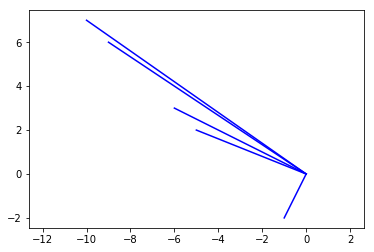

In [130]:
s=AllSegments()
for i in range(0,10,2):
    s.addBlue(-i-1,i-2,0,0)
for i in range(11,1,-2):
    s.addBlue(-i-1,i-2,0,0)
b=Bundle(1)
s.sortFlags()
for i in range(5):
    b.insertB(s.blue[2*i])
b.plot()

In [128]:
for i in range(len(s.flags)):
    [node,x]=b.flagTest(s.flags[-i])
    if x!=0:
        s.flags[-i].prt()
        print(x)
        node.val.prt()
        print(' ')

(0, 0)
(-4, 1) (0, 0) blue
1
(-1, -2) (0, 0) blue
 
(-4, 1)
(-4, 1) (0, 0) blue
1
(-1, -2) (0, 0) blue
 
(0, 0)
(-8, 5) (0, 0) blue
-1
(-9, 6) (0, 0) blue
 
(-8, 5)
(-8, 5) (0, 0) blue
-1
(-9, 6) (0, 0) blue
 
(0, 0)
(-12, 9) (0, 0) blue
1
(-10, 7) (0, 0) blue
 
(-12, 9)
(-12, 9) (0, 0) blue
1
(-10, 7) (0, 0) blue
 
(0, 0)
(-7, 4) (0, 0) blue
-1
(-9, 6) (0, 0) blue
 
(-7, 4)
(-7, 4) (0, 0) blue
-1
(-9, 6) (0, 0) blue
 
(0, 0)
(-3, 0) (0, 0) blue
1
(-1, -2) (0, 0) blue
 
(-3, 0)
(-3, 0) (0, 0) blue
1
(-1, -2) (0, 0) blue
 


In [22]:
tree = SplayTree()
tree.insert(33)
tree.insert(67)
tree.insert(44)
tree.insert(5)
tree.insert(112)
tree.insert(143)
tree.insert(165)
tree.insert(150)
l=tree.inorder()
print(l)

[5, 33, 44, 67, 112, 143, 150, 165]


In [232]:
[treeA,treeB]=tree.split(143)
treeA.pprint()
print(treeA.min,treeA.max)
treeB.pprint()
print(treeB.min,treeB.max)

└──143
     └──112
          └──33
               ├──67
               |    └──44
               └──5
5 143
└──150
     ├──165
150 165


In [ ]:
def makeSeg(px,py,qx,qy,col):
    return Segment(Point(px,py),Point(qx,qy),col)

def makeFlag(px,py,qx,qy,col,typ):
    seg=makeSeg(px,py,qx,qy,col)
    if typ==0:
        return Flag(seg,seg.p)
    return Flag(seg,seg.q)

#BundleList itself holds red bundles
class BundleList:
    def __init__(self,rang):
        redLow=Bundle(makeSeg(-rang,-rang,rang,-rang,0))
        
        blueLow=Bundle(makeSeg(-rang,-rang,rang,-rang,1))
        blueLow.bel=redLow
        redLow.abv=blueLow
        
        redHigh=Bundle(makeSeg(-rang,rang,rang,rang,0))
        redHigh.bel=blueLow
        blueLow.abv=redHigh
        
        blueHigh=Bundle(makeSeg(-rang,rang,rang,rang,1))
        blueHigh.bel=redHigh
        redHigh.abv=blueHigh
        
        
        self.lowest=redLow
        
    
    #input: flag
    #output: segment(bundle) directly below or has it as an endpt
    def findFlag(self,flag):
        
    
    #input:bundle to swap, 
    #output: if d==1 swap up, d==0 swap down
    def __swap(self,bundle,d):
        #bottom, a, b, top; to bottom, b, a, top
        if d==1:
            a=bundle
            b=bundle.abv
        else:
            a=bundle.bel
            b=bundle
        bottom=a.bel
        top=b.abv
        
        bottom.abv=b
        b.bel=bottom

        b.abv=a
        a.bel=b

        a.abv=top
        top.bel=a
        return True
            
    
    #input:bundle that is splitting, flag to split at, lower/upper to swap
    #output: splits the bundle, swap the appropriate parts
    def __split(self,bundle,flag,d):
        bottom=bundle.bel
        top=bundle.abv
        assert flag.cmp(bundle.min)>0 and flag.cmp(bundle.max)<0
        [tree1,tree2]=bundle.splitB(flag)
        tree1.bel=bottom
        
        tree1.abv=tree2
        tree2.bel=tree1
        
        tree2.abv=top
        return [tree1,tree2]
    
    def __join(self,bundle,d):
        if d==1:
            a=bundle
            b=bundle.above
        else:
            a=bundle.below
            b=bundle
        top=b.abv
        a.joinB(b)
        
        a.abv=top
        top.bel=a
        assert a.color!=a.abv.color and top.color!=top.bel.color
        return True
    
    def processFlag(self,flag)
        
        
        